In [16]:
import statsmodels.formula.api as smf
from preprocessor.paths import *
from prepro import *
import pandas as pd
import matplotlib.pyplot as plt

# from bokeh.plotting import figure, show


In [ ]:
folder = "data/energy"

fnames = [    
    '1_prot.csv', # Customer_1: 650kW Business1         Time, T_amb, T_RLprim, T_VLsek, T_RLsek, T_VLsek_tgt, T_RLprim_max, 
    '2_prot.csv', # Customer_2: 90kW  School_building1
    '3_prot.csv', # Customer_3: 160kW School_building2
    '4_prot.csv', # Customer_4:  60kW cityhall
    '5_prot.csv', # Customer_5: 100kW gymnasium
    '6_protSPS.csv', # Custo_6: 850kW Buisness2-factory 
    '7_prot.csv', # Customer_7: 30kW  Buisness2-offices 
    '8_prot.csv', # Customer_8: 350kW Business3
    '9_prot.csv', # Customer_9:  60kW Business4
    '901_protSPS.csv', # Main feeder (primary line)
    '1901_protWZ.csv', # Heat station
    '2901_protWZ.csv', # Wood boiler K421
    '3901_protWZ.csv', # oil boiler K431
    '4901_protWZ.csv', # oil boiler K441'          
          ]

# 1 Timestamp,T6 Aussentemp.(°C),T7 RL Primär(°C),T8 VL Sekundär(°C),T11 RL Sekundär(°C),Solltemp. VL Sekundär(°C),Max.Rücklauftemp.primär(°C),B-Solltemp.(°C),B-Status Pumpe,B-Status Kreis,B-Status Mischer,Puffer EIN Oben(°C),Puffer AUS Unten(°C),Ventilstellung(%),AT Mittel(°C),AT Langzeit(°C),WZ Wärmemenge(kWh),WZ Leistung(kW),WZ Duchfluss(l/h),WZ Rücklauftemp.(°C),WZ Vorlauftemp.(°C),WZ Spreizung(°C),Ventilstellung Gesamt(%)
# 2 Timestamp,T6 Aussentemp.(°C),T7 RL Primär(°C),T8 VL Sekundär(°C),T11 RL Sekundär(°C),Solltemp. VL Sekundär(°C),Max.Rücklauftemp.primär(°C),B-Solltemp.(°C),B-Status Pumpe,B-Status Kreis,B-Status Mischer,Puffer EIN Oben(°C),Puffer AUS Unten(°C),Ventilstellung(%),HKModule,AT Mittel(°C),AT Langzeit(°C),WZ Wärmemenge(kWh),WZ Leistung(kW),WZ Duchfluss(l/h),WZ Fehleranzeige,WZ Rücklauftemp.(°C),WZ Vorlauftemp.(°C),WZ Spreizung(°C),Ventilstellung Gesamt(%)
# 3 Timestamp,T6 Aussentemp.(°C),T7 RL Primär(°C),T8 VL Sekundär(°C),T11 RL Sekundär(°C),Solltemp. VL Sekundär(°C),Max.Rücklauftemp.primär(°C),B-Solltemp.(°C),B-Status Pumpe,B-Status Kreis,B-Status Mischer,C-T9 Speicher oben(°C),C-T10 Speicher unten(°C),Puffer EIN Oben(°C),Puffer AUS Unten(°C),Ventilstellung(%),HKModule,AT Mittel(°C),AT Langzeit(°C),WZ Wärmemenge(kWh),WZ Leistung(kW),WZ Duchfluss(l/h),WZ Fehleranzeige,WZ Rücklauftemp.(°C),WZ Vorlauftemp.(°C),WZ Spreizung(°C),Ventilstellung Gesamt(%),C-Pumpe Boiler
# 4 Timestamp,T6 Aussentemp.(°C),T7 RL Primär(°C),T8 VL Sekundär(°C),T11 RL Sekundär(°C),Solltemp. VL Sekundär(°C),Max.Rücklauftemp.primär(°C),B-Solltemp.(°C),B-Status Pumpe,B-Status Kreis,B-Status Mischer,Puffer EIN Oben(°C),Puffer AUS Unten(°C),Ventilstellung(%),HKModule,AT Mittel(°C),AT Langzeit(°C),WZ Wärmemenge(kWh),WZ Leistung(kW),WZ Duchfluss(l/h),WZ Rücklauftemp.(°C),WZ Vorlauftemp.(°C),WZ Spreizung(°C),Ventilstellung Gesamt(%)
# 5 Timestamp,T6 Aussentemp.(°C),T7 RL Primär(°C),T8 VL Sekundär(°C),T11 RL Sekundär(°C),Solltemp. VL Sekundär(°C),Max.Rücklauftemp.primär(°C),B-Solltemp.(°C),B-Status Pumpe,B-Status Kreis,B-Status Mischer,Puffer EIN Oben(°C),Puffer AUS Unten(°C),Ventilstellung(%),AT Mittel(°C),AT Langzeit(°C),WZ Wärmemenge(kWh),WZ Leistung(kW),WZ Duchfluss(l/h),WZ Fehleranzeige,WZ Rücklauftemp.(°C),WZ Vorlauftemp.(°C),WZ Spreizung(°C),Ventilstellung Gesamt(%),HKModule
# 6 Timestamp,T10 – Aussentemperatur(°C),T11 – primär Rücklauf(°C),T12 – sekundär Vorlauf(°C),T15 – sekundär Rücklauf(°C),K1 – Klappe Netzpumpe 1 offen,K2 – Klappe Netzpumpe 2 offen,Störung Ölkessel,Handbetrieb,P2 – Betrieb Netzpumpe 2,P2 – Störung Netzpumpe 2,DS1 – VL Druck(bar),DS2 – RL Druck(bar),P1 – Betrieb  Netzpumpe 1,P1 – Störung  Netzpumpe 1,Externe Sollwertvorgabe(°C),Dout7/7,Lastabwurf Ölkessel,P1/2 – Drehzahl Netzpumpen(%),Solltemp.VL Netz(°C),SollDifferenzdruck(bar),IstDifferenzdruck(bar),Wärmemenge(kWh),Volumen(m3),Leistung(kW),Duchfluss(lph),Rücklauftemp.(°C),Vorlauftemp.(°C),Spreizung(°C),Durchfluss sek.(m³/h),Ventilstellung gemittelt(%)
# 7 Timestamp,T6 Aussentemp.(°C),T7 RL Primär(°C),T8 VL Sekundär(°C),T11 RL Sekundär(°C),Solltemp. VL Sekundär(°C),Max.Rücklauftemp.primär(°C),B-Solltemp.(°C),B-Status Pumpe,B-Status Kreis,B-Status Mischer,Puffer EIN Oben(°C),Puffer AUS Unten(°C),Ventilstellung(%),HKModule,AT Mittel(°C),AT Langzeit(°C),WZ Wärmemenge(kWh),WZ Leistung(kW),WZ Duchfluss(l/h),WZ Rücklauftemp.(°C),WZ Vorlauftemp.(°C),WZ Spreizung(°C),Ventilstellung Gesamt(%)
# 8 Timestamp,T6 Aussentemp.(°C),T7 RL Primär(°C),T8 VL Sekundär(°C),T11 RL Sekundär(°C),Solltemp. VL Sekundär(°C),Max.Rücklauftemp.primär(°C),B-Solltemp.(°C),B-Raumtemp.(°C),B-Status Pumpe,B-Status Kreis,B-Status Mischer,Puffer EIN Oben(°C),Puffer AUS Unten(°C),Ventilstellung(%),HKModule,AT Mittel(°C),AT Langzeit(°C),WZ Wärmemenge(kWh),WZ Leistung(kW),WZ Duchfluss(l/h),WZ Fehleranzeige,WZ Rücklauftemp.(°C),WZ Vorlauftemp.(°C),WZ Spreizung(°C),Ventilstellung Gesamt(%)
# 9 Timestamp,T6 Aussentemp.(°C),T7 RL Primär(°C),T8 VL Sekundär(°C),T11 RL Sekundär(°C),Solltemp. VL Sekundär(°C),Max.Rücklauftemp.primär(°C),1-Vorlauftemp.(°C),1-Solltemp.(°C),1-Fernbedienung,1-Status Pumpe,1-Status Heizkreis,1-Status Mischer,2-Vorlauftemp.(°C),2-Solltemp.(°C),2-Status Pumpe,2-Status Heizkreis,2-Status Mischer,C-T9 Speicher oben(°C),C-T10 Speicher unten(°C),C-Solltemp. VL(°C),C-Status Boilerkreis,C-Pumpe Boiler,Puffer EIN Oben(°C),Puffer AUS Unten(°C),Ventilstellung(%),HKModule,AT Mittel(°C),AT Langzeit(°C),WZ Wärmemenge(kWh),WZ Leistung(kW),WZ Duchfluss(l/h),WZ Rücklauftemp.(°C),WZ Vorlauftemp.(°C),WZ Spreizung(°C),AOUT2(%),AOUT3(%),Ventilstellung Gesamt(%)
# 901 Timestamp,T485 - Aussentemperatur(°C),T462 - VL Netz(°C),T464 - RL Netz(°C),T471 - Pufferfühler 1 (oben)(°C),T472 - Pufferfühler 2(°C),T473 - Pufferfühler 3(°C),T474 - Pufferfühler 4(°C),T475 - Pufferfühler 5(°C),T476 - Pufferfühler 6(°C),T477 - Pufferfühler 7(°C),T478 - Pufferfühler 8(°C),T479 - Pufferfühler 9(°C),T480 - Pufferfühler 10 (unten)(°C),T434 - Vorlauftemperatur GK1(°C),T432 - Rücklauftemperatur GK1(°C),T444 - Vorlauftemperatur GK2(°C),T442 - Rücklauftemperatur GK2(°C),DS461 - Druck VL Netz(bar),DS462 - Druck RL Netz(bar),WE1 K421 - Betrieb Holzkessel,P431 - Störung Pumpe Gaskessel 1,"AK480 - Endlagenschalter Bypassklappe kl. Netz ""offen""","AK482 - Endlagenschalter Bypassklappe gr. Netz ""offen""",P461 - Freigabe Netzpumpe 1,P462 - Freigabe Netzpumpe 2,P463 - Freigabe Netzpumpe 3,AK480 - Bypassklappe kl. Netz AUF,AK482 - Bypassklappe gr. Netz AUF,P431 - Freigabe Pumpe Gaskessel 1,P441 - Freigabe Pumpe Gaskessel 2,P471 - Freigabe Pumpe Teilstromfilter,P461 - Leistungsvorgabe Netzpumpe 1-3(%),V481 - Stellsignalvorgabe Netzm. kl. Netz(%),V483 - Stellsignalvorgabe Netzm. gr. Netz(%),WE1 K421 - Leistungsvorgabe Holzkessel(%),WE1 K421 - Temperaturvorgabe Holzkessel(°C),WE2 K431 - Temperaturvorgabe Gaskessel 1(°C),P431 - Leistungsvorgabe Pumpe Gaskessel 1(%),P441 - Leistungsvorgabe Pumpe Gaskessel 2(%),Soll VL-Netz(°C),K1-Soll-VL(°C),K2-Soll-VL(°C),K3-Soll-VL(°C),SollNiveauK1,Soll-Diff.Druck(bar),Ist-Diff.Druck(bar),Anf. Last 6,Stufe Netzmischer,Wärmemenge(kWh),Volumen(m3),Leistung(kW),Duchfluss(lph),AT Mittel(°C),SPLZ Ist Kessel 1(%),SPLZ Soll Kessel 1(%),SPLZ Ist Kessel 2(%),SPLZ Soll Kessel 2(%),SPLZ Ist Kessel 3(%),SPLZ Soll Kessel 3(%),Stellung Netzmischer 1(%),Stellung Netzmischer 2(%),Hand Lüftung,AG1 - Sperre Alarmwähler
# 1006 Timestamp,WZ Wärmemenge(kWh),WZ Leistung(kW),WZ Durchfluss(l/h),WZ Rücklauftemp.(°C),WZ Vorlauftemp.(°C),WZ Spreizung(°C)
# 1901 Timestamp,WZ Wärmemenge(kWh),WZ Leistung(kW),WZ Durchfluss(l/h),WZ Rücklauftemp.(°C),WZ Vorlauftemp.(°C),WZ Spreizung(°C)
# 2901 Timestamp,WZ Wärmemenge(kWh),WZ Leistung(kW),WZ Durchfluss(l/h),WZ Rücklauftemp.(°C),WZ Vorlauftemp.(°C),WZ Spreizung(°C)
# 3901 Timestamp,WZ Wärmemenge(kWh),WZ Leistung(kW),WZ Durchfluss(l/h),WZ Rücklauftemp.(°C),WZ Vorlauftemp.(°C),WZ Spreizung(°C)
# 4901 Timestamp,WZ Wärmemenge(kWh),WZ Leistung(kW),WZ Durchfluss(l/h),WZ Rücklauftemp.(°C),WZ Vorlauftemp.(°C),WZ Spreizung(°C)




In [ ]:

dfs = []
for f in plant_file_names:
    # Read directly as time series
    df_temp = pd.read_csv(folder + "/" + f, index_col=0, parse_dates=True, infer_datetime_format=True, dayfirst=True)
    dfs.append(df_temp)

In [ ]:
# Importing library
import plotly.express as px
import pandas as pd


# Plotting Bar Plot for created Dataset With
# Enabled Scroll Zoom
plot = px.line(dfs[0], x="Timestamp", y="WZ Wärmemenge(kWh)")

# Showing Scatter Plot with Scroll Zoom.
plot.show(config={'scrollZoom': True})



In [ ]:
dfs[0].groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(

    kind='bar', rot=0, ax=axs

)

In [18]:
p = figure(title="Simple line example", x_axis_label='x', y_axis_label='y')
x = df_temp.index
y = df_temp["WZ Wärmemenge(kWh)"]
# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]
p.line(x, y, legend_label="Temp.", line_width=2)
show(p)


In [15]:
df_temp.columns

Index(['WZ Wärmemenge(kWh)', 'WZ Leistung(kW)', 'WZ Durchfluss(l/h)',
       'WZ Rücklauftemp.(°C)', 'WZ Vorlauftemp.(°C)', 'WZ Spreizung(°C)'],
      dtype='object')

NameError: name 'dfs' is not defined

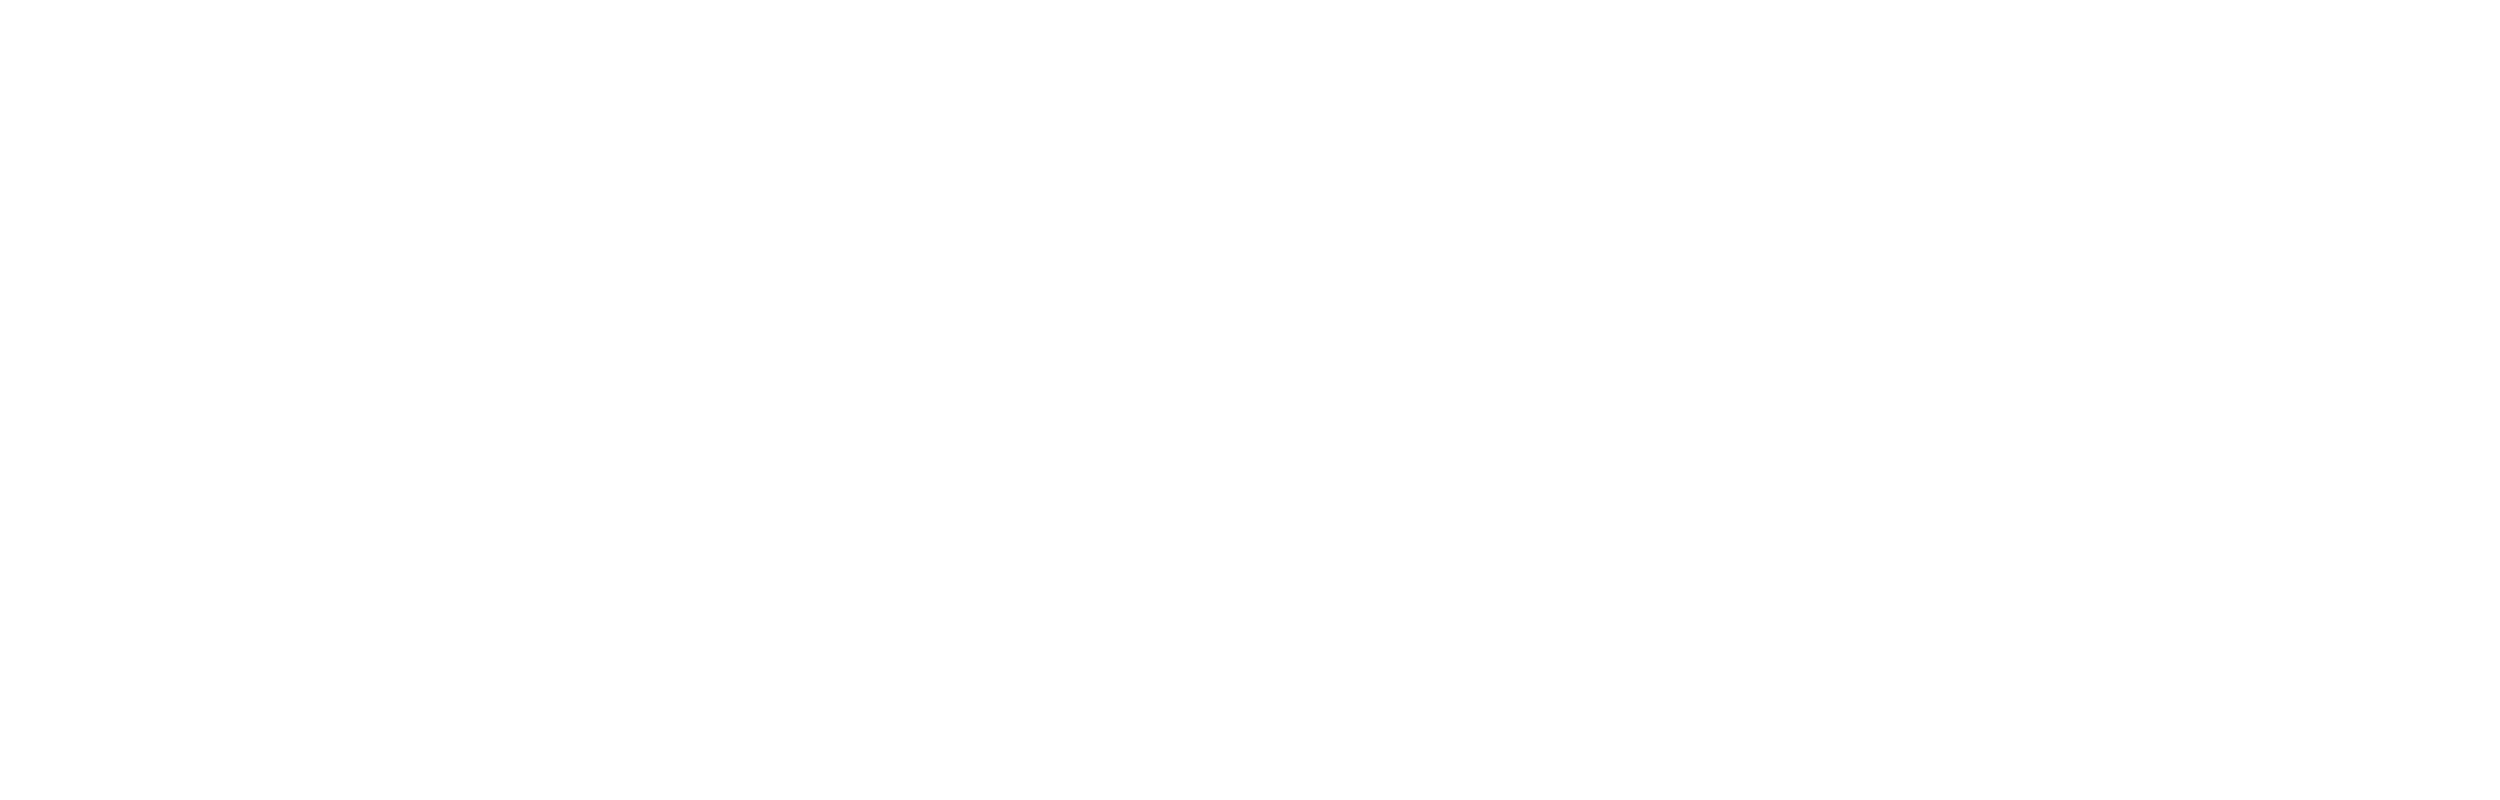

In [7]:
column = "WZ Leistung(kW)"

fig = plt.figure(figsize=(25,8))
fig.clear()

i = 0
for df in dfs[0:1]:
    df[column].plot(ax=fig.gca(), label=labels[i], legend=True)
    i = i+1

ax = fig.gca()
ax.set_ylim(0, 2500)
ax.set_ylabel('Power (kW)')
ax.set_xlabel(None)
plt.grid()


/tmp/ipykernel_31994/2485098750.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(folder + "/" + plant_file_name, index_col=0, parse_dates=True, infer_datetime_format=True, dayfirst=True)


Text(0.5, 0, '')

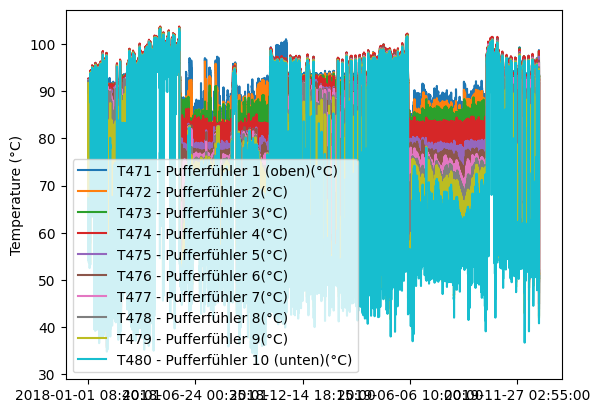

In [13]:
#%% Heat store Temperatures ===================================================
plant_file_name = '901_protSPS.csv'

df = pd.read_csv(folder + "/" + plant_file_name, index_col=0, parse_dates=True, infer_datetime_format=True, dayfirst=True)

fig = plt.figure(2)
fig.clear()
df2 = df.iloc[:, 3:13]
df2.plot(ax=fig.gca(), legend=True)
ax = fig.gca()
ax.set_ylabel('Temperature (°C)')
ax.set_xlabel(None)



Text(0, 0.5, 'Temperature (°C)')

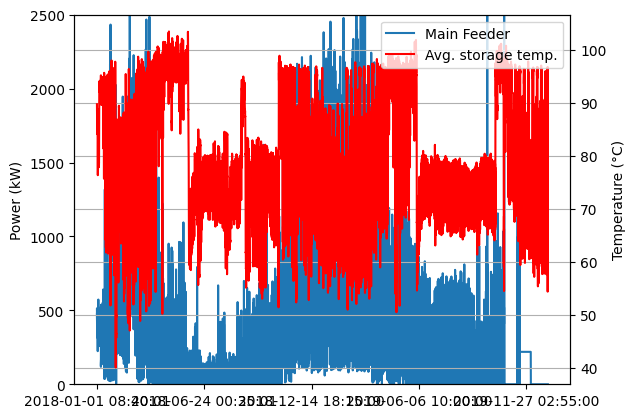

In [14]:

# Average store temperature and main feeder power
df3 = df2.mean(axis=1)

fig = plt.figure(4)
fig.clear()
ax = fig.gca()
dfs[0][column].plot(ax=ax, label='Main Feeder')
ax.set_ylim(0, 2500)

ax2 = ax.twinx()
df3.plot(ax=ax2, label='Avg. storage temp.', style='r')
plt.grid()
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

ax.set_ylabel('Power (kW)')
ax.set_xlabel(None)
ax2.set_ylabel('Temperature (°C)')


In [15]:

#%% Consumption ===============================================================

load_file_names =  ['1901_protWZ.csv', 
                    '1_prot.csv',
                    '2_prot.csv',
                    '3_prot.csv',
                    '4_prot.csv',
                    '5_prot.csv',
                    '1006_protWZ.csv',
                    '7_prot.csv',
                    '8_prot.csv',
                    '9_prot.csv']

labels = ['Main Feeder',
          'Load 1', 
          'Load 2', 
          'Load 3', 
          'Load 4', 
          'Load 5', 
          'Load 6', 
          'Load 7', 
          'Load 8', 
          'Load 9', 
          ]

dfs = []
for f in load_file_names:
    # Read directly as time series
    df_temp = pd.read_csv(folder + "/" + f, index_col=0, parse_dates=True, infer_datetime_format=True, dayfirst=True)
    dfs.append(df_temp)
    

/tmp/ipykernel_31994/2129916690.py:29: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_temp = pd.read_csv(folder + "/" + f, index_col=0, parse_dates=True, infer_datetime_format=True, dayfirst=True)
/tmp/ipykernel_31994/2129916690.py:29: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_temp = pd.read_csv(folder + "/" + f, index_col=0, parse_dates=True, infer_datetime_format=True, dayfirst=True)
/tmp/ipykernel_31994/2129916690.py:29: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict versi

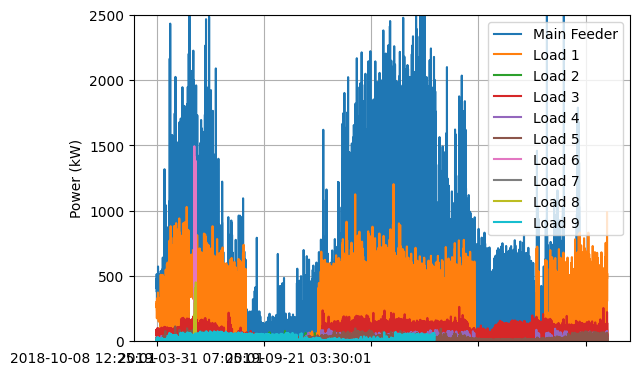

In [16]:

#%% Select a column and create an overview plot

column = "WZ Leistung(kW)"

fig = plt.figure(3)
fig.clear()

i = 0
for df in dfs:
    df[column].plot(ax=fig.gca(), label=labels[i], legend=True)
    i = i+1

ax = fig.gca()
ax.set_ylim(0, 2500)
ax.set_ylabel('Power (kW)')
ax.set_xlabel(None)
plt.grid()


In [17]:

# Now sum up all loads and add to plot (to compare with main feeder measurement)
dfs2 = dfs[1:]

i = 0
for df in dfs2:
    df.index = df.index.round('min')
    dfs2[i] = df[column]
    i = i+1
    
test = pd.concat(dfs2, axis=1)
test.dropna(inplace=True)

test.sum(axis=1).plot(ax=fig.gca(), label='Sum of Loads', legend=True, style='k--')

AttributeError: 'Index' object has no attribute 'round'